# DATASCI207 Final Project - Data Exploration

**Import Packages**

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import random
from datetime import date as dt

# visualizations
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

# others
from yellowbrick.cluster import KElbowVisualizer

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/marketing_campaign.csv',delimiter='\t')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
pd.set_option('display.max_columns', None)

# provide a summary of the data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Drop Unused Variables**

In [4]:
# all the data for Z_CostContact is 3
# all the data for Z_Revenue is 11
# I couldn't find either of them in the data dictionary so I decided to drop them here!
df = df.drop(['Z_CostContact','Z_Revenue'], axis = 1)

**Check for missing (NaN) values**

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

*Note: There are 24 null values in the Income column.*

In [6]:
df['Income'].fillna(0, inplace=True) # we need to decide if we drop these records or replace it with 0

**Variables - Customer Profile**

**(1) # of Kids/Teenagers at home**

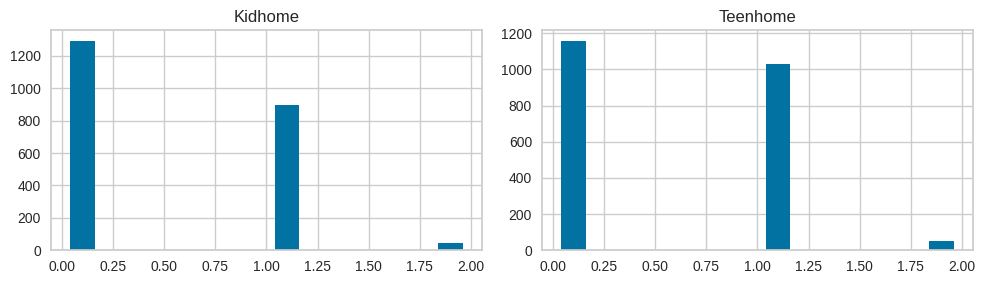

In [7]:
variables = ['Kidhome','Teenhome']
df[variables].hist(bins=10, rwidth=0.6, figsize=(10, 3))
plt.tight_layout()
plt.show()

In [8]:
# combine the number of teens and the number of kids into one column called children
df["Children"]=(df["Kidhome"]+df["Teenhome"]).astype(int)
children = df['Children'].value_counts().reset_index()
children

,Children,count
0,1,1128
1,0,638
2,2,421
3,3,53


**(2) Education**

In [9]:
# Combined '2n Cycle' to 'Master'

df.loc[df['Education'].isin(['2n Cycle']), 'Education'] = 'Master'
Education = df['Education'].value_counts().reset_index()
Education

,Education,count
0,Graduation,1127
1,Master,573
2,PhD,486
3,Basic,54


<Axes: xlabel='Education', ylabel='count'>

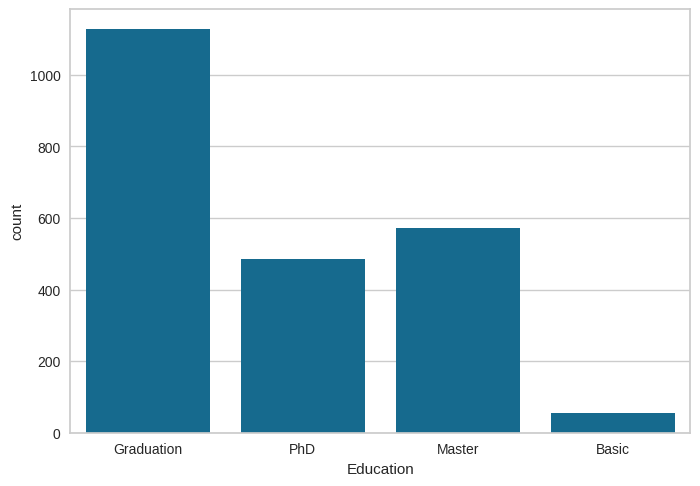

In [10]:
sns.countplot(x=df['Education'])

**(3) Marital Status**

In [11]:
Marital_Status = df['Marital_Status'].value_counts().reset_index()
Marital_Status

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


<Axes: xlabel='Marital_Status', ylabel='count'>

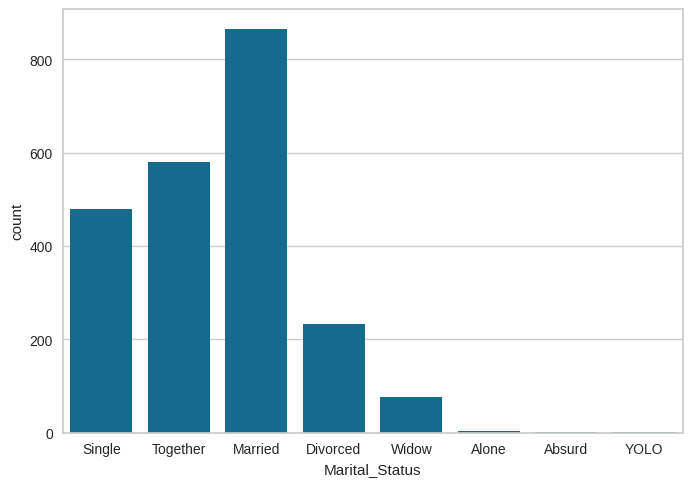

In [12]:
sns.countplot(x=df['Marital_Status'])

In [13]:
# map the marital status into number of family sizes
marital_status_mapping = {'Single': 1, 'Together':2,'Married': 2, 'Divorced': 1, 'Widow': 1, 'Alone': 1,'Absurd':1,'YOLO':1}

In [14]:
# create a family size column by adding the number of children in
df['Family_Size'] = df['Marital_Status'].map(marital_status_mapping).astype(int) + df['Children']

In [15]:
Family_Size = df['Family_Size'].value_counts().reset_index()
Family_Size

,Family_Size,count
0,3,889
1,2,764
2,4,301
3,1,254
4,5,32


**(4) Income**

In [16]:
# create income buckets
buckets = [(0, 30000),(30001, 60000),(60001, 90000)]
# define labels for each bucket
labels = ['Low Income', 'Medium Income', 'High Income']

# create a function to assign income buckets
def assign_bucket(income):
    for i, (min, max) in enumerate(buckets):
        if min <= income <= max:
            return labels[i]
    return 'Very High Income'

df['Income_Buckets'] = df['Income'].apply(assign_bucket)

In [17]:
Income = df['Income_Buckets'].value_counts().reset_index()
Income

,Income_Buckets,count
0,Medium Income,1005
1,High Income,788
2,Low Income,394
3,Very High Income,53


<Axes: xlabel='Income_Buckets', ylabel='count'>

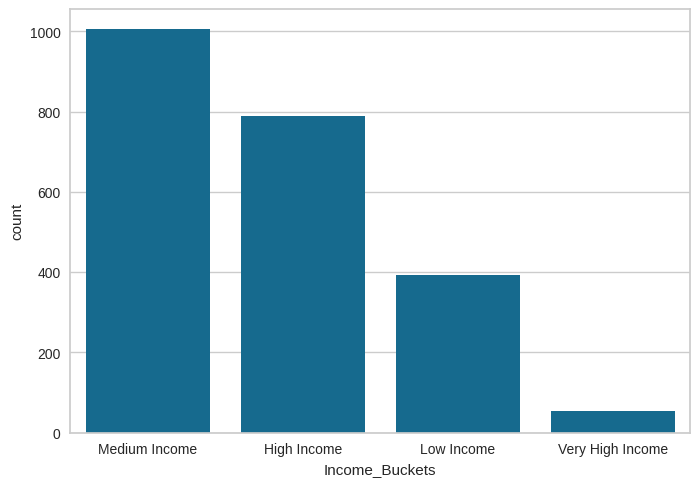

In [18]:
sns.countplot(x=df['Income_Buckets'])

**(5) Age**

In [19]:
# compute age from year of birth
df['age'] = 2024 - df['Year_Birth']

# identified three outliers here: age 131, 125 and 124
Age = df['age'].value_counts().reset_index().sort_values(by='age', ascending=False)
Age.head(10)

,age,count
56,131,1
54,125,1
57,124,1
58,84,1
55,83,1
48,81,7
49,80,7
47,79,8
43,78,16
44,77,16


In [20]:
# create age buckets
buckets = [(0, 19),(20, 39),(40, 59),(60,100)]
# define labels for each bucket
labels = ['Teenagers', 'Young Adults', 'Middle-Aged Adults','Seniors']

# create a function to assign age buckets
def assign_age_bucket(age):
    for i, (min, max) in enumerate(buckets):
        if min <= age <= max:
            return labels[i]
    return 'Outliers'

df['Age_Buckets'] = df['age'].apply(assign_age_bucket)

Age = df['Age_Buckets'].value_counts().reset_index()
Age

,Age_Buckets,count
0,Middle-Aged Adults,1233
1,Seniors,783
2,Young Adults,221
3,Outliers,3


<Axes: xlabel='Age_Buckets', ylabel='count'>

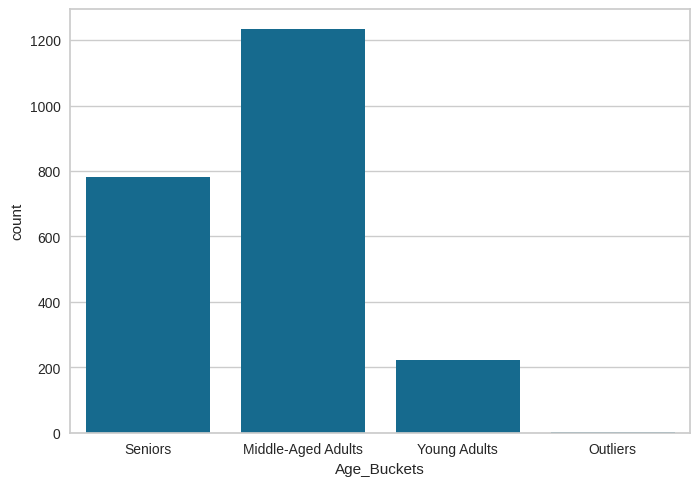

In [21]:
sns.countplot(x=df['Age_Buckets'])

**Variables - Customer Purchasing Pattern**

**(1) Promotions / Campaigns**

In [22]:
# compute the total number of campaigns accepted (out of 5)
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

TotalAcceptedCmp = df['TotalAcceptedCmp'].value_counts().reset_index()
TotalAcceptedCmp

,TotalAcceptedCmp,count
0,0,1777
1,1,325
2,2,83
3,3,44
4,4,11


In [23]:
NumDealsPurchases = df['NumDealsPurchases'].value_counts().reset_index().sort_values(by='NumDealsPurchases', ascending=False)
NumDealsPurchases

,NumDealsPurchases,count
10,15,7
14,13,3
13,12,4
12,11,5
11,10,5
9,9,8
8,8,14
7,7,40
5,6,61
4,5,94


**(2) Products**

In [24]:
df['TotalAmtSpent'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

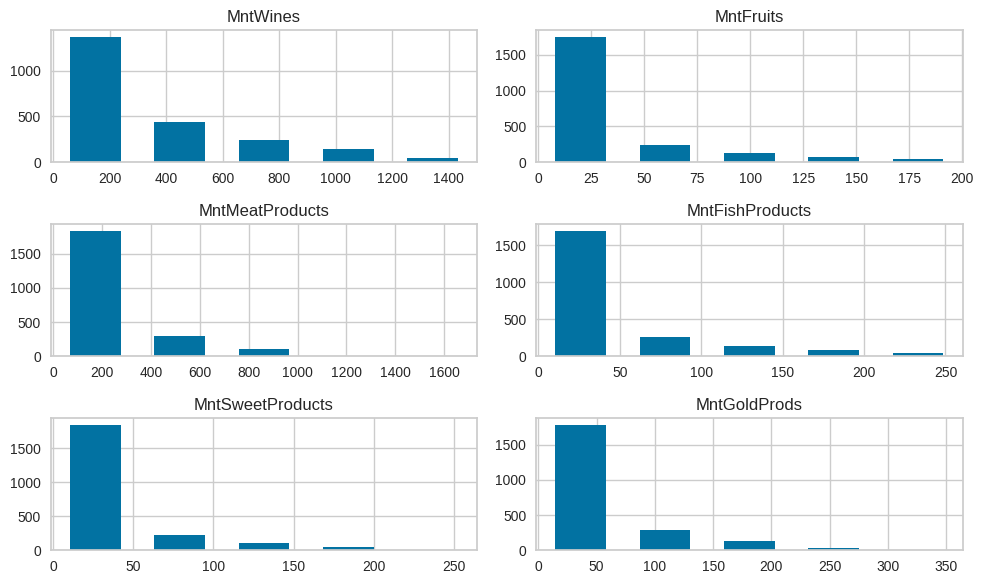

In [25]:
variables = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df[variables].hist(bins=5, rwidth=0.6, figsize=(10, 6))
plt.tight_layout()
plt.show()

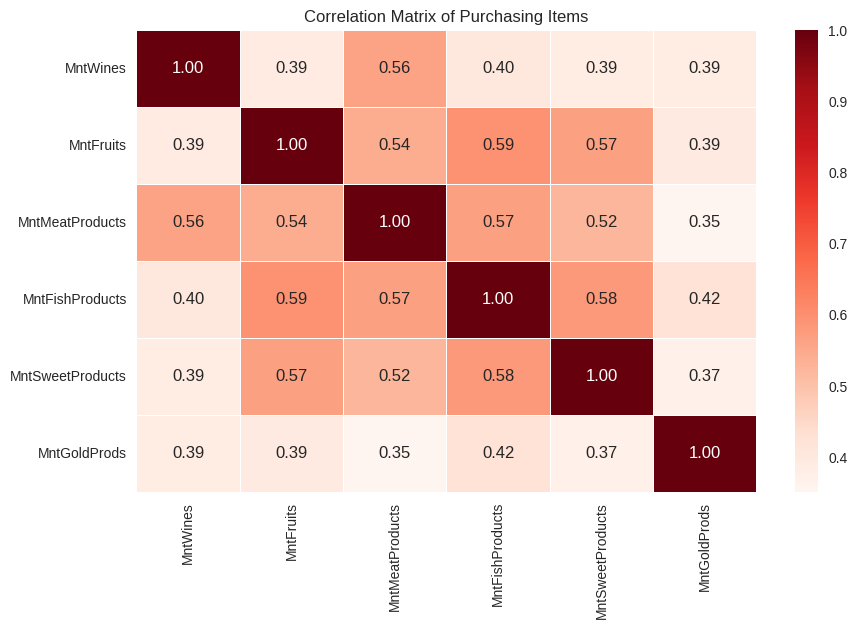

In [26]:
# calculate correlation matrix
variables = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
correlation_matrix = df[variables].corr()

# plot the result into a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Purchasing Items')
plt.show()

**(2) Purchasing Location**

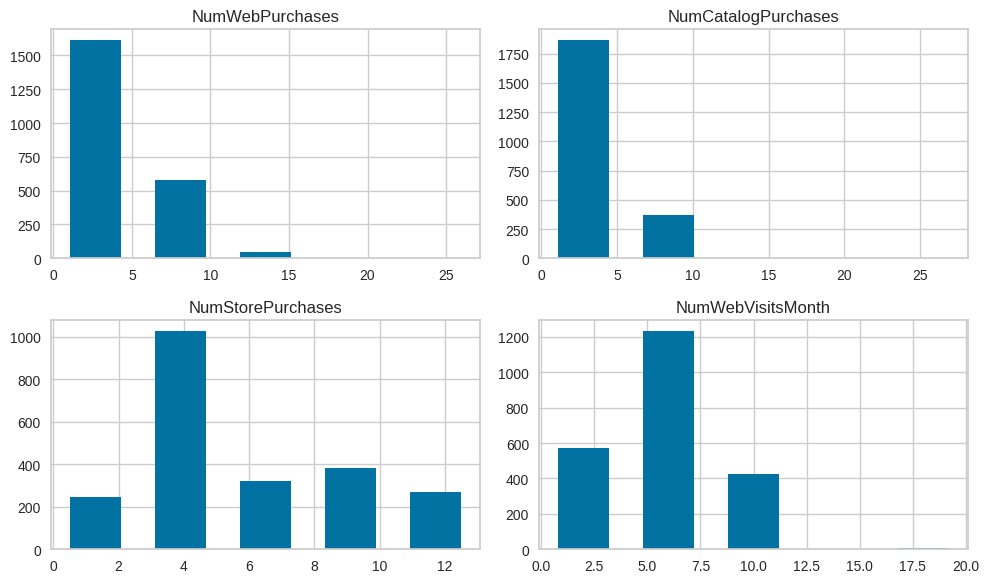

In [27]:
variables = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
df[variables].hist(bins=5, rwidth=0.6, figsize=(10, 6))
plt.tight_layout()
plt.show()

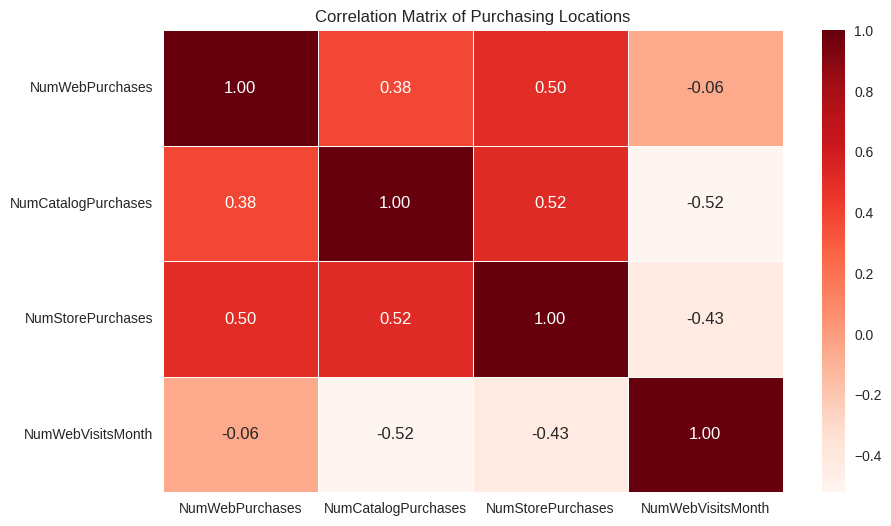

In [28]:
# calculate correlation matrix
variables = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
correlation_matrix = df[variables].corr()

# plot the result into a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Purchasing Locations')
plt.show()

**Variables - Customer Loyalty**

**(1) # of Days Enrolled in the company**

In [29]:
# compute the number of days the customer has enrolled in the company

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['days_enrolled'] = (dt.today() - df['Dt_Customer'].dt.date).apply(lambda x: x.days)

In [30]:
# compute an average
avg_days_enrolled = df['days_enrolled'].mean()
avg_days_enrolled/365

10.755019569471624

Note: An average customer has been with the company for ~11 years.

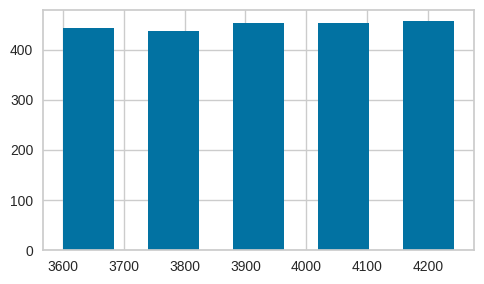

In [31]:
df['days_enrolled'].hist(bins=5, rwidth=0.6, figsize=(5,3))
plt.tight_layout()
plt.show()

**(2) Recency**

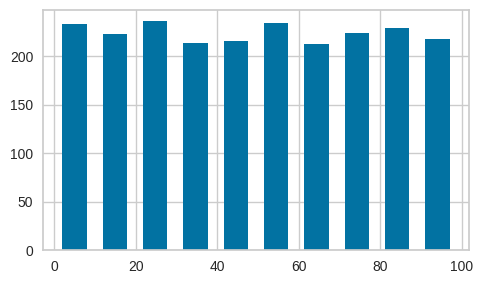

In [32]:
# Number of days since customer's last purchase - smaller the better
df['Recency'].hist(bins=10, rwidth=0.6, figsize=(5,3))
plt.tight_layout()
plt.show()

**(3) Complaint**

In [33]:
Complain = df['Complain'].value_counts().reset_index()
Complain

,Complain,count
0,0,2219
1,1,21


**Final Output**

In [34]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Family_Size,Income_Buckets,age,Age_Buckets,TotalAcceptedCmp,TotalAmtSpent,days_enrolled
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,Medium Income,67,Seniors,0,1617,4235
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,Medium Income,70,Seniors,0,27,3685
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,2,High Income,59,Middle-Aged Adults,0,776,3884
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3,Low Income,40,Middle-Aged Adults,0,53,3711
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3,Medium Income,43,Middle-Aged Adults,0,422,3733
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,1,3,High Income,57,Middle-Aged Adults,0,716,3865
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,1,2,Medium Income,53,Middle-Aged Adults,0,590,4165
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,1,3,Medium Income,39,Young Adults,0,169,3989
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,1,3,Medium Income,50,Middle-Aged Adults,0,46,3960
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,2,4,Low Income,74,Seniors,1,49,3680


In [35]:
# drop unused/redundant features - I'm still thinking about what we can do with the education column
# Apr 3rd update: I dropped the ID column as well!
df_cleaned = df.drop(['ID','Year_Birth','Marital_Status','Kidhome','Teenhome','Dt_Customer','Income_Buckets','Age_Buckets'], axis = 1)
df_cleaned = df_cleaned[df_cleaned['age'] <= 100]
df_cleaned.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Family_Size,age,TotalAcceptedCmp,TotalAmtSpent,days_enrolled
0,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,67,0,1617,4235
1,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,70,0,27,3685
2,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,2,59,0,776,3884
3,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3,40,0,53,3711
4,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3,43,0,422,3733


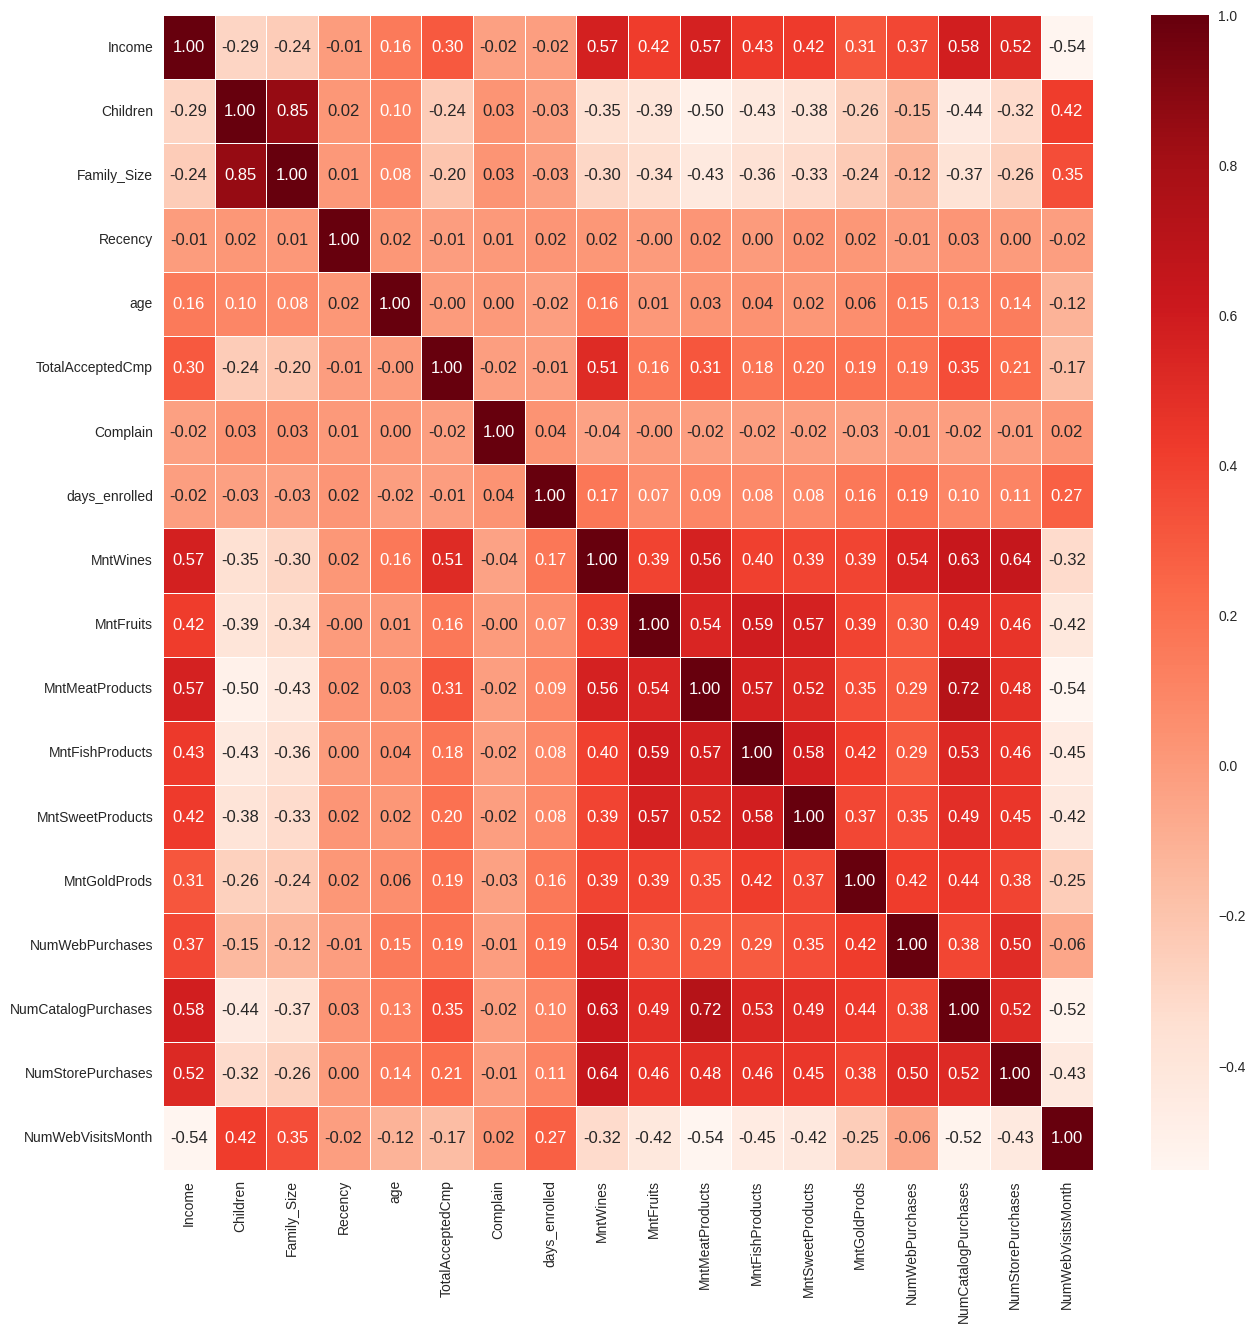

In [36]:
variables = ['Income','Children','Family_Size','Recency','age','TotalAcceptedCmp','Complain','days_enrolled',
             'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
             'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
correlation_matrix = df_cleaned[variables].corr()

# plot the result into a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.show()

In [37]:
# Convert categorical columns, i.e. Education, to sparse numerical representations
LE=LabelEncoder()
categorical_columns = ['Education']
for i in categorical_columns:
    df_cleaned[i]=df_cleaned[[i]].apply(LE.fit_transform)

In [38]:
# Scale the features in the df

# Not sure if we want to drop these columns below
# del_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
# features = df_cleaned.drop(del_cols, axis=1)
# scaler = StandardScaler()
# scaler.fit(features)
# scaled_features = pd.DataFrame(scaler.transform(features),columns= features.columns)

scaler = StandardScaler()
scaler.fit(df_cleaned)
df_scaled = pd.DataFrame(scaler.transform(df_cleaned),columns= df_cleaned.columns)

In [39]:
#PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca.fit(df_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2237.0,-4.446848e-17,2.803879,-5.386746,-2.397598,-0.934331,2.053724,9.162595
col2,2237.0,-4.129216e-17,1.587792,-3.828514,-0.796019,-0.095044,0.344431,9.383559
col3,2237.0,3.493952e-17,1.465487,-3.742246,-1.090712,-0.206807,0.933766,6.299270


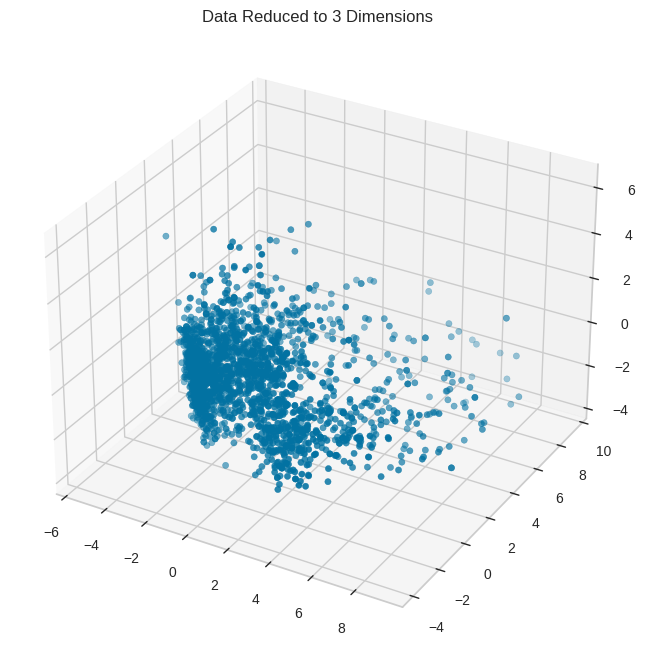

In [40]:
#3D projection of data
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(PCA_ds["col1"],PCA_ds["col2"],PCA_ds["col3"], marker="o",cmap = 'viridis')
ax.set_title("Data Reduced to 3 Dimensions")
plt.show()

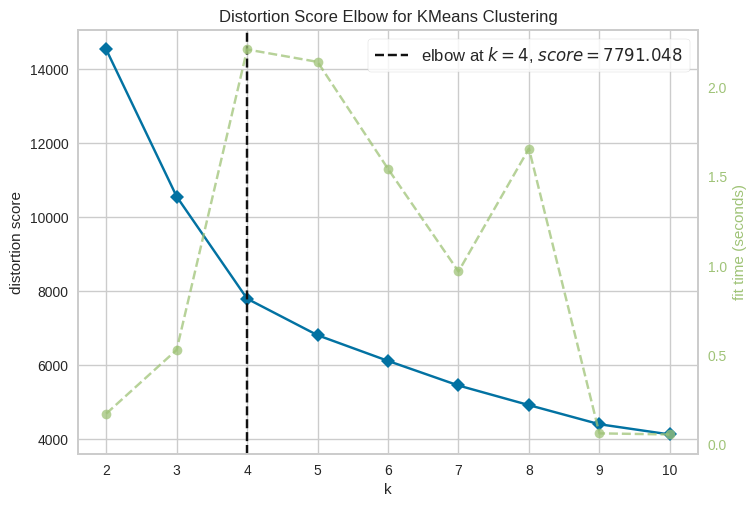

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Determine number of clusters with Elbow Method
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(PCA_ds)
elbow.show()

**MODEL 1: MINI BATCH K-MEANS**

In [42]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(4)
kfit = kmeans.fit(PCA_ds)
clusters = kfit.predict(PCA_ds)

In [43]:
df_cleaned['Cluster'] = clusters
PCA_ds["Cluster"] = clusters
display(df_cleaned.sort_values(by='Cluster'))

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Family_Size,age,TotalAcceptedCmp,TotalAmtSpent,days_enrolled,Cluster
1121,3,31605.0,15,74,0,42,2,1,6,2,2,1,4,7,0,0,0,0,0,0,0,1,3,45,0,125,4156,0
793,1,51267.0,37,183,2,64,7,2,12,4,3,3,5,4,0,0,0,0,0,0,0,2,4,46,0,270,3815,0
794,1,46524.0,70,31,19,35,26,14,52,2,1,1,5,3,0,0,0,0,0,0,0,1,2,63,0,177,4022,0
795,2,45183.0,33,219,3,60,12,9,12,1,4,1,7,7,0,1,0,0,0,0,0,0,1,62,1,315,4097,0
1638,1,44078.0,17,24,1,10,2,0,4,2,2,0,3,5,0,0,0,0,0,0,0,2,4,55,0,41,3582,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,3,53374.0,34,896,10,101,13,10,34,6,4,2,9,9,1,0,0,0,0,0,1,1,3,55,1,1064,4254,3
1859,1,54006.0,42,174,77,203,6,24,97,2,8,1,7,7,0,0,0,0,0,0,0,1,3,39,0,581,4221,3
1860,3,69063.0,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,1,3,58,0,928,4171,3
503,3,64355.0,66,1047,0,140,67,38,153,2,4,3,12,8,0,0,0,0,0,0,0,1,3,39,0,1445,4246,3


In [44]:
# get centroids of each cluster
centroids = kmeans.cluster_centers_

# get labels of each cluster
cluster_labels = kmeans.labels_

# analyze characteristics of each cluster
for i in range(4):
    cluster_data = df_cleaned[cluster_labels == i]
    centroid = centroids[i]

    print(f"Cluster {i}: Size = {len(cluster_data)}")
    print("Mean of each feature:")
    print(cluster_data.mean(axis=0))
    print("-------------------------")

Cluster 0: Size = 1031
Mean of each feature:
Education                  1.587779
Income                 34758.385063
Recency                   49.024248
MntWines                  42.422890
MntFruits                  5.202716
MntMeatProducts           22.819593
MntFishProducts            7.270611
MntSweetProducts           5.308438
MntGoldProds              15.159069
NumDealsPurchases          1.916586
NumWebPurchases            2.074685
NumCatalogPurchases        0.560621
NumStorePurchases          3.253152
NumWebVisitsMonth          6.335597
AcceptedCmp3               0.066925
AcceptedCmp4               0.009699
AcceptedCmp5               0.000000
AcceptedCmp1               0.000000
AcceptedCmp2               0.001940
Complain                   0.010669
Response                   0.079534
Children                   1.201746
Family_Size                2.844811
age                       52.476237
TotalAcceptedCmp           0.078565
TotalAmtSpent             98.183317
days_enrolled      

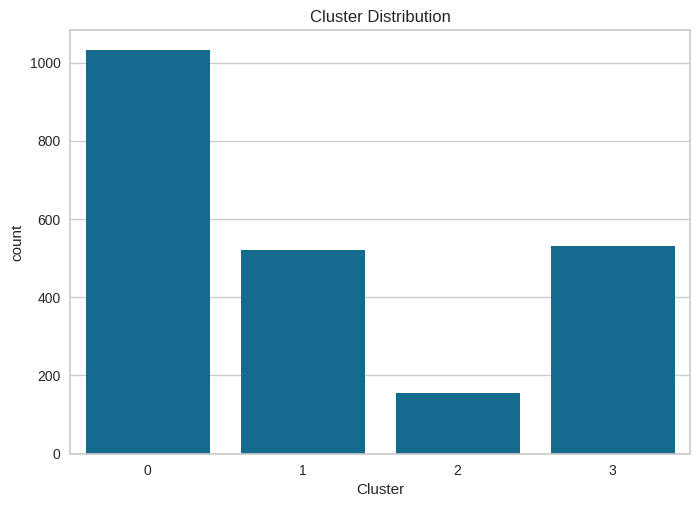

In [45]:
pl = sns.countplot(x= df_cleaned['Cluster'])
pl.set_title("Cluster Distribution")
plt.show()

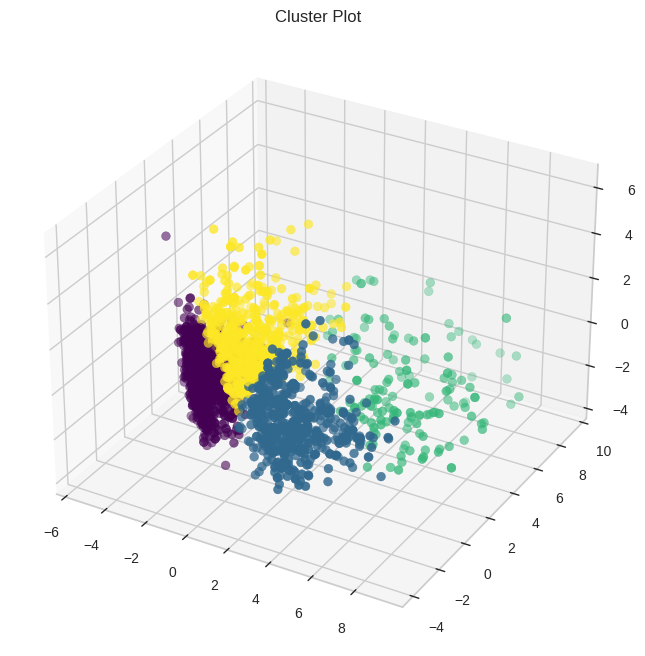

In [46]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_ds["col1"],PCA_ds["col2"],PCA_ds["col3"], s=40, c=PCA_ds["Cluster"], marker='o', cmap = 'viridis' )
ax.set_title("Cluster Plot")
plt.show()

In [47]:
# create an empty list
feature_list = []

# iterate over each feature
for column in df_cleaned.columns:
    if column != 'Cluster':
        # get the mean value for each cluster
        mean_val = [cluster_data[column].mean() for cluster_data in [df_cleaned[cluster_labels == i] for i in range(4)]]

        # round the value into two decimal places
        mean_val_rounded = [round(value, 2) for value in mean_val]

        # create a dataframe
        df = {'Cluster': [f'Cluster {i}' for i in range(4)], f'Mean_{column}': mean_val_rounded}
        mean_df = pd.DataFrame(df)

        # append the dataframe to the list
        feature_list.append(mean_df)


for i, df in enumerate(feature_list):
    print(df)
    print("------------------------------------------")


     Cluster  Mean_Education
0  Cluster 0            1.59
1  Cluster 1            1.62
2  Cluster 2            1.75
3  Cluster 3            1.83
------------------------------------------
     Cluster  Mean_Income
0  Cluster 0     34758.39
1  Cluster 1     73530.01
2  Cluster 2     78948.94
3  Cluster 3     55137.47
------------------------------------------
     Cluster  Mean_Recency
0  Cluster 0         49.02
1  Cluster 1         50.51
2  Cluster 2         46.05
3  Cluster 3         48.76
------------------------------------------
     Cluster  Mean_MntWines
0  Cluster 0          42.42
1  Cluster 1         524.00
2  Cluster 2         890.36
3  Cluster 3         425.76
------------------------------------------
     Cluster  Mean_MntFruits
0  Cluster 0            5.20
1  Cluster 1           68.40
2  Cluster 2           49.38
3  Cluster 3           19.04
------------------------------------------
     Cluster  Mean_MntMeatProducts
0  Cluster 0                 22.82
1  Cluster 1        

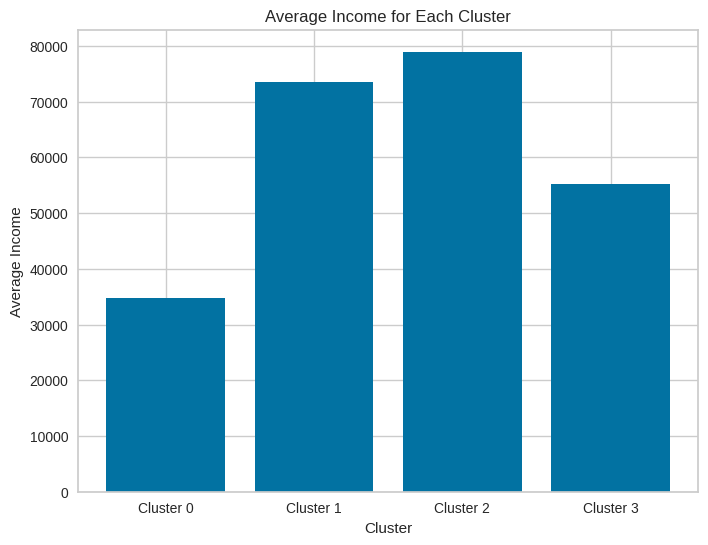

In [48]:
# if we need graph - e.g. extract mean income for each cluster
mean_income = [cluster_data['Income'].mean() for cluster_data in [df_cleaned[cluster_labels == i] for i in range(4)]]

plt.figure(figsize=(8, 6))
plt.bar(range(4), mean_income)
plt.title('Average Income for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.xticks(range(4), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [49]:
from scipy.spatial import distance

# compute distances among centroids using Euclidean distance
for i in range(len(centroids)):
    for j in range(i+1, len(centroids)):
        centroid1 = centroids[i]
        centroid2 = centroids[j]
        dist = distance.euclidean(centroid1, centroid2)
        print(f"Distance between centroid {i} and centroid {j}: {dist}")

Distance between centroid 0 and centroid 1: 5.628080357248252
Distance between centroid 0 and centroid 2: 8.326635633893178
Distance between centroid 0 and centroid 3: 3.240954299871806
Distance between centroid 1 and centroid 2: 5.503366207369116
Distance between centroid 1 and centroid 3: 4.005154590543956
Distance between centroid 2 and centroid 3: 6.863015571744602


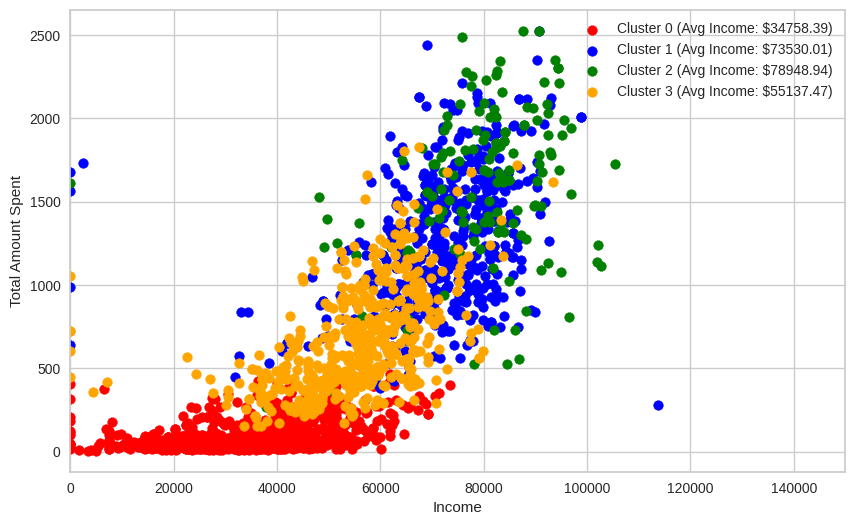

In [54]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange']

for i in range(4):
    cluster_data = df_cleaned[cluster_labels == i]
    mean_income = cluster_data['Income'].mean()
    plt.scatter(cluster_data['Income'], cluster_data['TotalAmtSpent'], label=f'Cluster {i} (Avg Income: ${mean_income:.2f})', color=colors[i])

plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.legend()
plt.grid(True)

plt.xlim(right=150000)
plt.xlim(left=0)
plt.show()